<img src="../../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Seaborn-Numerical Data</H1></u></center>

In [1]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Plotting univariate distributions:

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


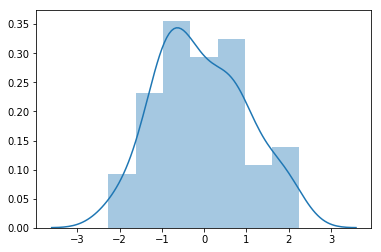

In [2]:
# displot function
x = np.random.normal(size=100)
sns.distplot(x)

### Histograms:

#### A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. we also can plot a rug plot, which draws a small vertical tick at each observation.

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


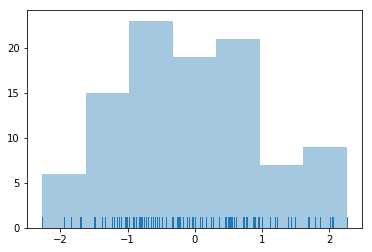

In [5]:
sns.distplot(x, kde=False, rug=True)

### Kernel Density Estimation:

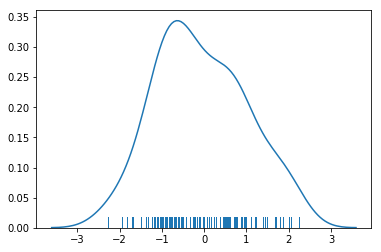

In [6]:
sns.distplot(x, hist=False, rug=True)

In [ ]:
sns.kdeplot(x, shade=True)

#### The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram.

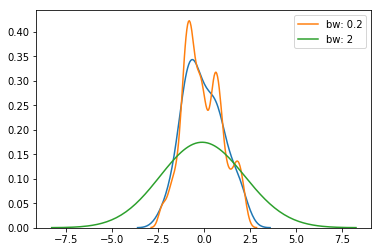

In [11]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

### Fitting parametric distributions:
You can use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data.

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


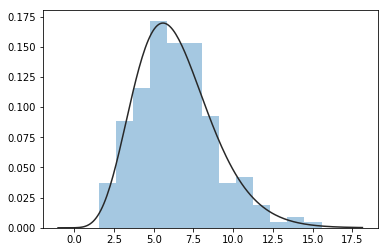

In [12]:
from scipy import stats
x = np.random.gamma(6, size=200) # 8 is the shape of Gamma distribution
sns.distplot(x, kde=False, fit=stats.gamma)

### Plotting bivariate distributions:

### Join Plot:

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


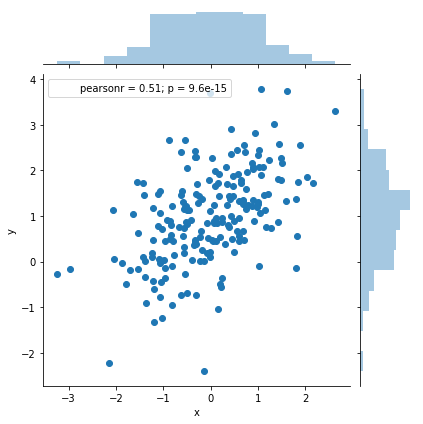

In [13]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df)

### Hexbin plots:
it shows the counts of observations that fall within hexagonal bins

x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


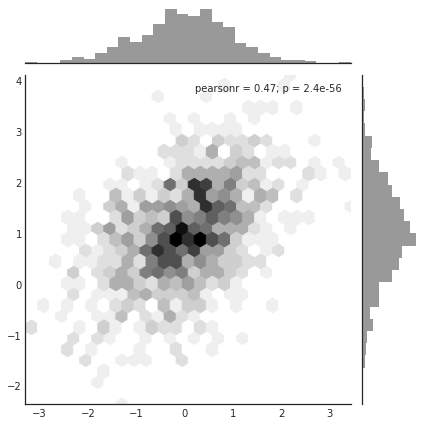

In [14]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Kernel density estimation:

#### you can also plot two-dimensional kernel density plot

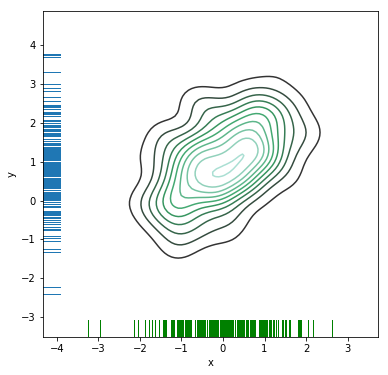

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

#### The jointplot() function uses a JointGrid to manage the figure.

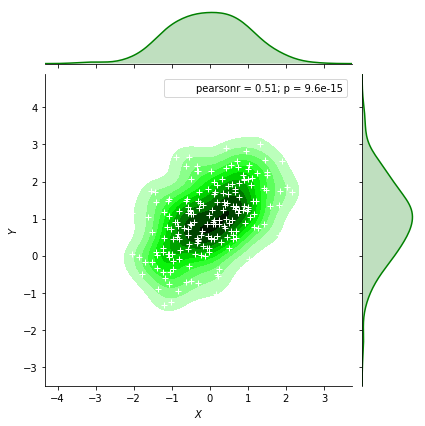

In [16]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="g")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

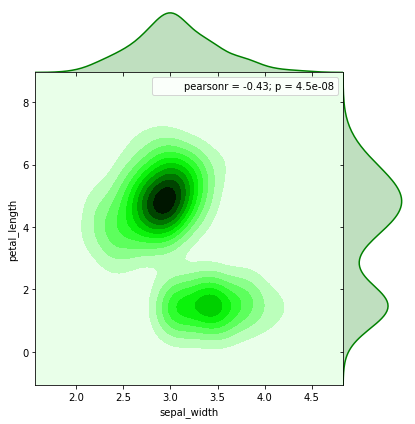

In [17]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde", space=0, color="g")

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


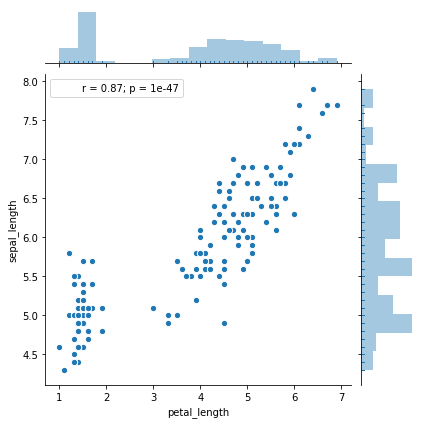

In [18]:
g = sns.jointplot("petal_length", "sepal_length", data=iris,
                  marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"),
                  s=40, edgecolor="w", linewidth=1)

### Scatter plot and Join Density Estimate Plot:

F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


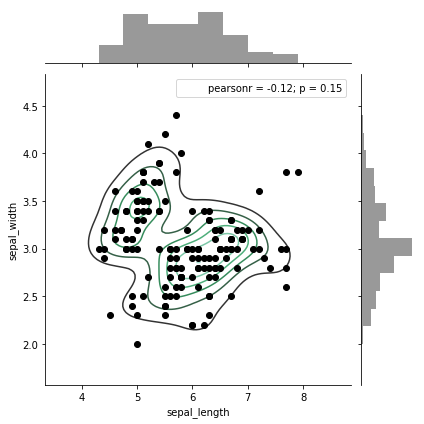

In [19]:
g = (sns.jointplot("sepal_length", "sepal_width",
                   data=iris, color="k")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

### Visualizing pairwise relationships in a dataset:
pairplot() function creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame

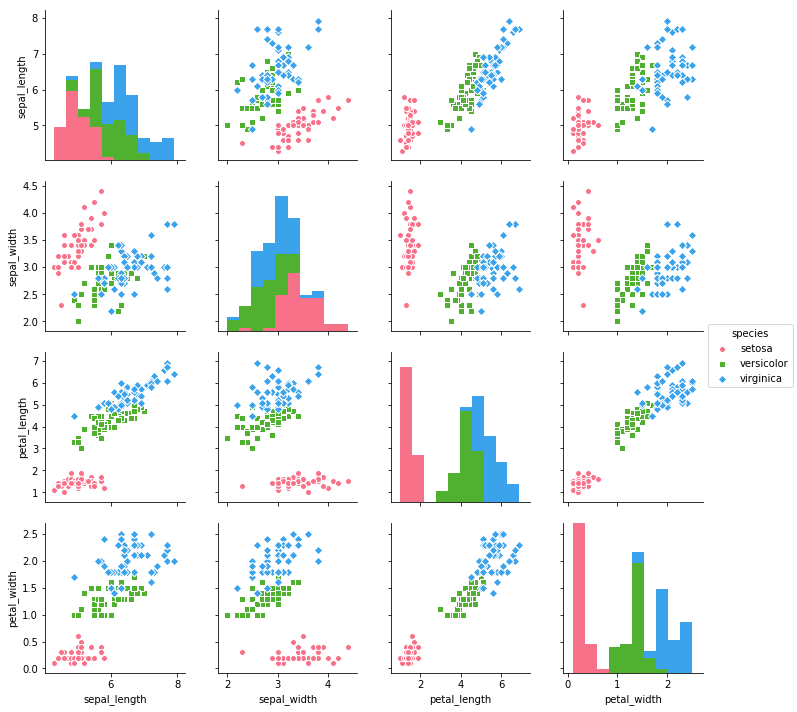

In [20]:
iris = sns.load_dataset("iris")
sns.pairplot(iris,palette='husl',hue='species',markers=["o", "s", "D"])

#### Fit Linear Regression to data:

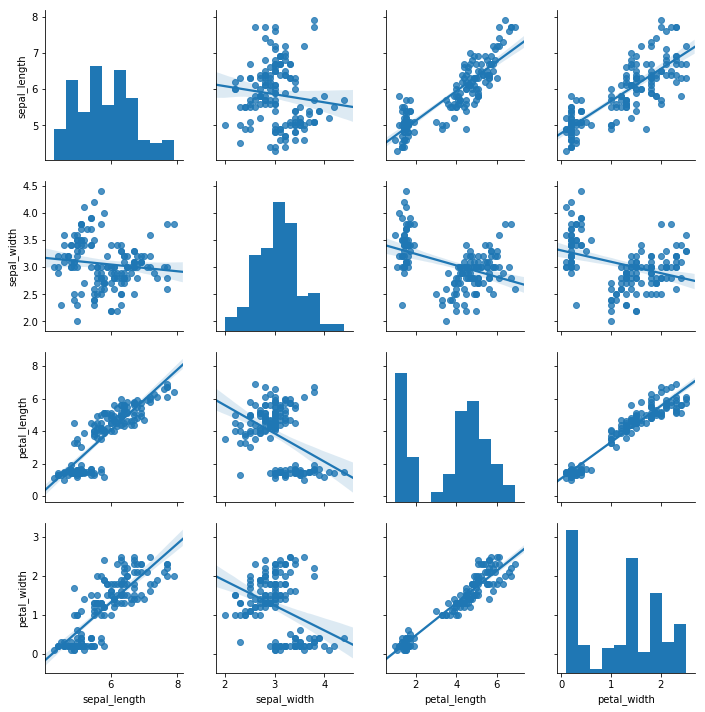

In [21]:
g = sns.pairplot(iris, kind="reg")

## Heat Map:

In [22]:
# Load the example flights dataset
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Plotting a correlation matrix:

In [23]:
flights_long.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


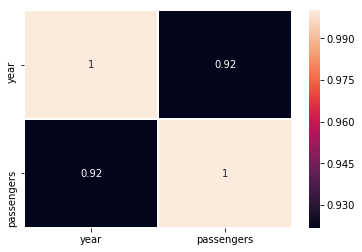

In [24]:
sns.heatmap(flights_long.corr(), annot=True, linewidths=.5)

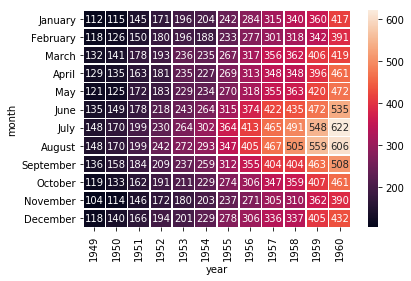

In [25]:
flights = flights_long.pivot("month", "year", "passengers")
# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5) # fmt="d" : Integer formatting

### Changing the color map:

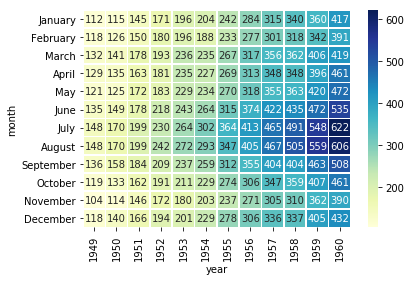

In [26]:
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu") 
# if you dont need the colobar:cbar=False

### Using a mask to plot the half of the matrix:

In [27]:
corr = np.corrcoef(np.random.randn(10, 200))
corr.shape

(10L, 10L)

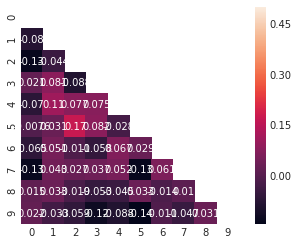

In [28]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from(arr): Return the indices for the upper-triangle of arr.
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, annot=True)

## Cluster Map:

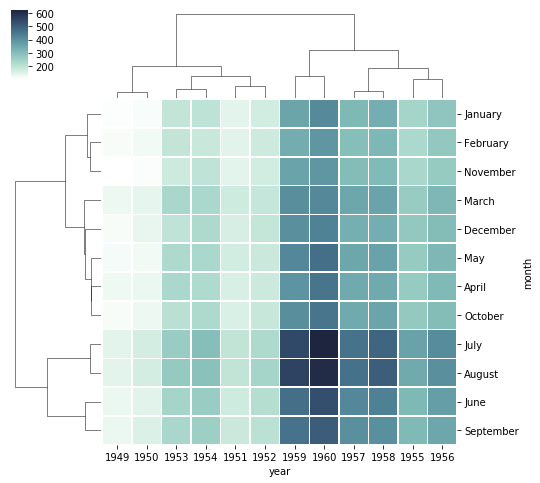

In [29]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(flights, cmap=cmap, linewidths=.5,figsize=(8, 8))

### Normalize data across the rows:

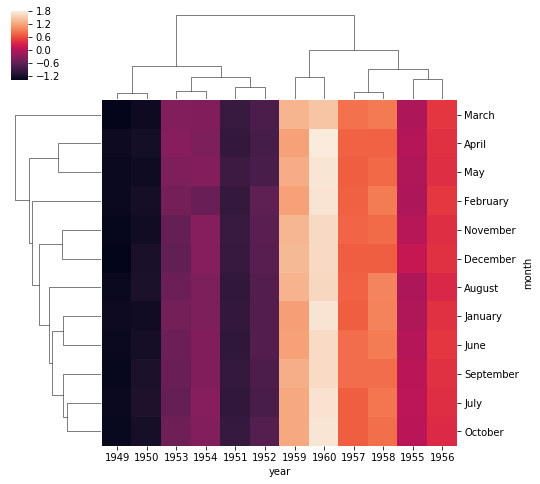

In [30]:
g = sns.clustermap(flights, z_score=0, figsize=(8, 8))

### Standardize the data across the columns:

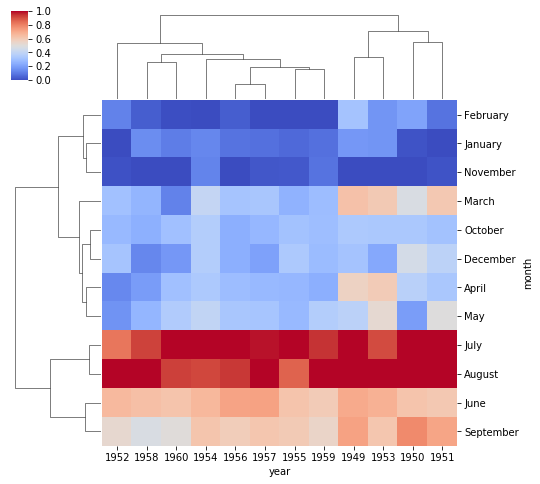

In [31]:
g = sns.clustermap(flights, standard_scale=1,cmap='coolwarm',figsize=(8, 8))

## Reference:

https://seaborn.pydata.org/